In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("classic")
import numpy as np

In [2]:
# Einkommen bekommt zwei Variablen, das Anfangsgehalt und die Inflationsrate
def einkommen(Gehalt, Inflation):
    monat = np.array([Gehalt])
    for i in range (34):
        monat = np.append(monat,(monat[i]*Inflation))
    jahr = np.array([])
    for i in range (35):
        jahr = np.append (jahr, monat[i]*12)
    return monat, jahr

In [3]:
# Wertsteigerung bekommt zwei Variablen, den Anfangswert der Immobilie und die %-Steigerung Wert pro Jahr
def wertsteigerung(Anfangswert_Haus, Wertsteigerung_Haus):
    wert = np.array([Anfangswert_Haus])
    for i in range (34):
        wert = np.append(wert, wert[i]*Wertsteigerung_Haus)
    return wert

In [4]:
# Instandhaltung bekommt Array mit Wert des Hauses übergeben und Variable prozentuale Instandhaltungskosten
def instandhaltung(aktueller_wert_haus, instandhaltungskosten):
    b = np.array([])
    for i in range (35):
        b = np.append(b, aktueller_wert_haus[i]*instandhaltungskosten)
    return b

In [5]:
# Privatausgaben bekommt zwei Variablen, die Ausgaben im Jahr 2020 und die Inflationsrate
def privatausgaben (Ausgaben_Monat, Inflation):
    monat = np.array([Ausgaben_Monat])
    for i in range (34):
        monat = np.append(monat, monat[i]*Inflation)
    jahr = np.array([])
    for i in range (35):
        jahr = np.append (jahr, monat[i]*12)
    return monat, jahr

In [6]:
# Zins + Tilgung. A = Annuität
def zinstilgung (Darlehensbetrag, Kreditlaufzeit, Zinsen):
    A = (Darlehensbetrag * (Zinsen**Kreditlaufzeit) * ((Zinsen-1)/((Zinsen**Kreditlaufzeit)-1)))/12
    monat = np.full(shape= 35, fill_value = A)
    jahr = monat *12
    return monat, jahr

In [7]:
# Rendite erzeugt ein Array für 'Kontostand' aus ursprünglichem Kontostand mit Rendite und Array Sparrate
def rendite (Kontostand, Rendite_Anlage, sparrate):
    wert = np.array([Kontostand+sparrate[0]])
    for i in range (34):
        wert = np.append(wert, (wert[i]*Rendite_Anlage)+sparrate[i+1])
    return wert

In [8]:
# Monatsmiete, warm
def miete (Monatsmiete, Mietsteigerung):
    wert = np.array([Monatsmiete])
    for i in range (34):
        wert = np.append(wert, wert[i]*Mietsteigerung)
    jahr = np.array([])
    for i in range (35):
        jahr = np.append (jahr, wert[i]*12)
    return wert, jahr

In [9]:
def Kaufen(Kontostand, Anfangswert_Haus, Eigenkapital, Kaufnebenkosten,Darlehensbetrag,Kreditlaufzeit,Zinsen, Gehalt2020, Inflation, Ausgaben_Monat, Wertsteigerung_Haus, Instandhaltungskosten, Rendite_Anlage):
    Kaufen_Anfang_Kontostand=Kontostand-(Anfangswert_Haus*Eigenkapital)-(Anfangswert_Haus*Kaufnebenkosten)
    Kaufen = pd.DataFrame({'Zins_Tilgung':zinstilgung(Darlehensbetrag,Kreditlaufzeit, Zinsen)[0],
                      'Zins_Tilgung_pro_Jahr':zinstilgung(Darlehensbetrag,Kreditlaufzeit, Zinsen)[1],
                      'Einkommen_Monat':einkommen (Gehalt2020, Inflation)[0],
                      'Einkommen_Jahr':einkommen (Gehalt2020, Inflation)[1],
                      'Privatausgaben_Monat':privatausgaben(Ausgaben_Monat, Inflation)[0],
                      'Privatausgaben_Jahr':privatausgaben(Ausgaben_Monat, Inflation)[1],
                      'Immobilienwert':wertsteigerung(Anfangswert_Haus, Wertsteigerung_Haus)
                      })
    Kaufen ["Instandhaltung"] = instandhaltung(Kaufen ["Immobilienwert"],Instandhaltungskosten)
    Kaufen ["Ausgaben_gesamt"] = Kaufen['Privatausgaben_Jahr']+Kaufen['Instandhaltung']+Kaufen['Zins_Tilgung_pro_Jahr']
    Kaufen ["Sparrate"] = Kaufen['Einkommen_Jahr']-Kaufen ["Ausgaben_gesamt"]
    Kaufen ["Kontostand"] = rendite (Kaufen_Anfang_Kontostand,Rendite_Anlage, Kaufen ["Sparrate"])
    Kaufen ["Gesamtwert_Kaufen"] = Kaufen ["Kontostand"] + Kaufen ["Immobilienwert"]
    return  Kaufen ["Gesamtwert_Kaufen"]

In [10]:
def Mieten(Monatsmiete, Mietsteigerung, Gehalt2020,Inflation,Ausgaben_Monat, Kontostand, Rendite_Anlage):
    Mieten = pd.DataFrame ({'Miete_Monat': miete(Monatsmiete, Mietsteigerung)[0],
                            'Miete_Jahr':miete(Monatsmiete, Mietsteigerung)[1],
                            'Einkommen_Monat': einkommen (Gehalt2020, Inflation)[0],
                            'Einkommen_Jahr': einkommen (Gehalt2020, Inflation)[1],
                            'Privatausgaben_Monat': privatausgaben(Ausgaben_Monat, Inflation)[0],
                            'Privatausgaben_Jahr': privatausgaben(Ausgaben_Monat, Inflation)[1],
                            })
    Mieten ["Ausgaben_gesamt"] = Mieten['Privatausgaben_Jahr']+Mieten['Miete_Jahr']
    Mieten ["Sparrate"] = Mieten['Einkommen_Jahr']-Mieten ["Ausgaben_gesamt"]
    Mieten ["Kontostand_Mieten"] = rendite (Kontostand, Rendite_Anlage, Mieten ["Sparrate"])
    return Mieten ["Kontostand_Mieten"]

In [11]:
# Kaufen["Gesamtwert"].plot(figsize=(15,6), color="red")
# Mieten["Kontostand"].plot(figsize=(15,6), color = "green")

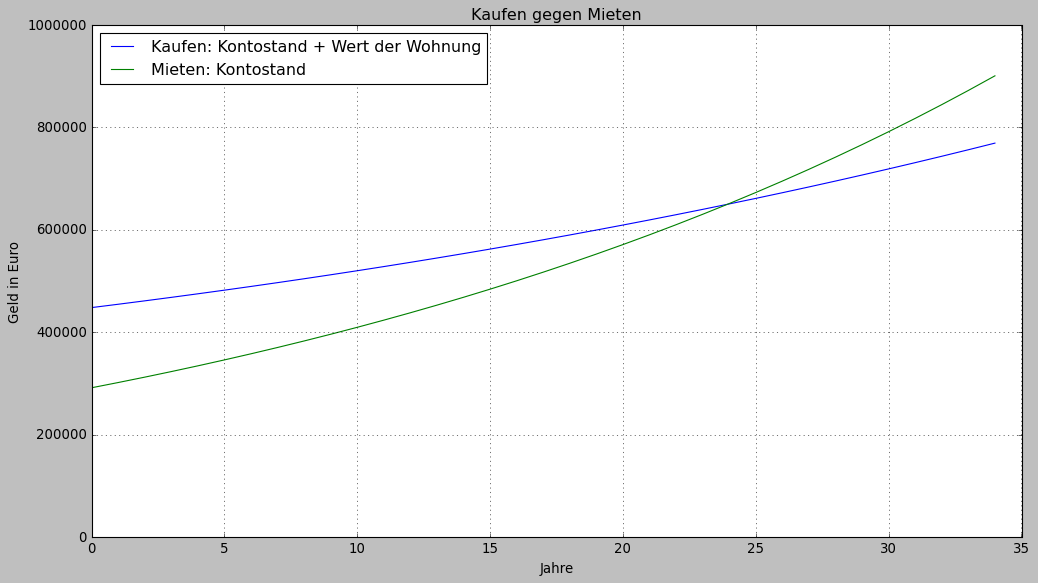

In [20]:
Kontostand = 290000 # Derzeitig verfügbares Geld
Anfangswert_Haus = 375000 # Der Wert des Hauses oder der Wohnung, die Du kaufen möchtest
Eigenkapital = 0.5 # Wie viel % Du von der 
Kaufnebenkosten = 0.07 # Makler, Notar etc
Darlehensbetrag = (Anfangswert_Haus*Kaufnebenkosten + Anfangswert_Haus)*(1-Eigenkapital) # Darlehen
Kreditlaufzeit = 35 # Jahre
Zinsen = 1.01 
Gehalt2020 = 1420 # Gehaltssituation im Mittel  für Kreditlaufzeit, ohne Beförderung etc
Inflation = 1.015
Ausgaben_Monat = 650 # Essen, Unterhaltung, Kino, Wein, Urlaub, laufende Kosten etc
Wertsteigerung_Haus = 1.02 # Indikator für wie qualitativ das Haus ist oder wie gut die Lage ist
Instandhaltungskosten = 0.015 # Altbau hat mehr, Neubau weniger
Rendite_Anlage = 1.03 # Qualität der Geldanlage, zu erwartende Rendite im Mittel
Monatsmiete = 650 # Indikator für Qualität der Wohnsituation
Mietsteigerung = 1.015 # In gefragteren Gegenden steigt es mehr, sonst wie Inflation
# ______________________________________________________________________________________________________
Kauf = Kaufen(Kontostand, Anfangswert_Haus, Eigenkapital, Kaufnebenkosten,Darlehensbetrag,Kreditlaufzeit,Zinsen, Gehalt2020, Inflation, Ausgaben_Monat, Wertsteigerung_Haus, Instandhaltungskosten, Rendite_Anlage)
Miet = Mieten(Monatsmiete, Mietsteigerung, Gehalt2020,Inflation,Ausgaben_Monat, Kontostand, Rendite_Anlage)
# ______________________________________________________________________________________________________
#plt.figure(figsize=(15,8), facecolor="white", tight_layout=True)
Kauf.plot(figsize=(15,8), legend=True, label= "Kaufen: Kontostand + Wert der Wohnung")
Miet.plot(figsize=(15,8), legend=True, label= "Mieten: Kontostand")
plt.xlabel("Jahre")
plt.ylabel("Geld in Euro")
plt.ylim(0)
plt.grid()
# plt.yticks([100000,200000,300000,400000,500000,600000,700000,800000], 
#            labels=["100.000", "200.000", "300.000","400.000", "500.000","600.000","700.000","800.000"])
#plt.tick_params(axis='x')

plt.style.use("classic")
#plt.ticklabel_format(style="scientific")

plt.title("Kaufen gegen Mieten") 
plt.show()

In [22]:
Ergebnisse_Kaufen = []
Ergebnisse_Mieten = []
for i in range (10000):
    Kontostand = 295000 # np.random.randint(50000,300000,1) # Derzeitig verfügbares Geld
    Anfangswert_Haus = 375000 # np.random.randint(300000,500000,1) # Der Wert des Hauses oder der Wohnung, die Du kaufen möchtest
    Eigenkapital = np.random.uniform(0.2,0.5) # Wie viel % Du vom Haus direkt bezahlst
    Kaufnebenkosten = np.random.uniform(0.07,0.07) # Makler, Notar etc, 12% fix
    Darlehensbetrag = (Anfangswert_Haus*Kaufnebenkosten + Anfangswert_Haus)*(1-Eigenkapital) # Darlehen
    Kreditlaufzeit = 35
    Zinsen = 1.01 # Fixe 1% Zinsen auf Kredite
    Gehalt2020 = np.random.randint(1500,2300,1) # Gehaltssituation im Mittel  für Kreditlaufzeit, ohne Beförderung etc
    Inflation = np.random.uniform(1.01,1.02) # Fixe 1% Inflation
    Ausgaben_Monat = np.random.randint(650,850,1) # Essen, Unterhaltung, Kino, Wein, Urlaub, laufende Kosten etc
    Wertsteigerung_Haus = np.random.uniform(1.01,1.04) # Indikator für wie qualitativ das Haus ist oder wie gut die Lage ist
    Instandhaltungskosten = np.random.uniform(0.01,0.02) # Altbau hat mehr, Neubau weniger. Pro Jahr in %
    Rendite_Anlage = np.random.uniform(1.01,1.06) # Qualität der Geldanlage, zu erwartende Rendite im Mittel
    Monatsmiete = np.random.randint(615,900,1) # Indikator für Qualität der Wohnsituation
    Mietsteigerung = np.random.uniform(1.01,1.04) # In gefragteren Gegenden steigt es mehr, sonst wie Inflation
    Kauf = Kaufen(Kontostand, Anfangswert_Haus, Eigenkapital, Kaufnebenkosten,Darlehensbetrag,Kreditlaufzeit,Zinsen, Gehalt2020, Inflation, Ausgaben_Monat, Wertsteigerung_Haus, Instandhaltungskosten, Rendite_Anlage)
    Miet = Mieten(Monatsmiete, Mietsteigerung, Gehalt2020,Inflation,Ausgaben_Monat, Kontostand, Rendite_Anlage)
    Ergebnisse_Kaufen.append(Kauf[34])
    Ergebnisse_Mieten.append(Miet[34])

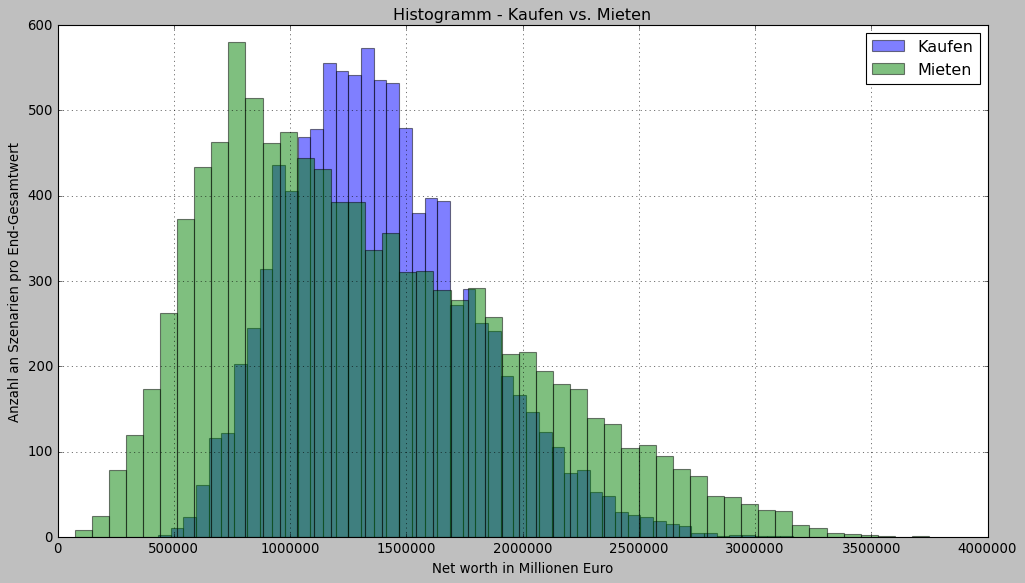

In [23]:
plt.figure(figsize=(15,8)) #, facecolor="white")
plt.hist(Ergebnisse_Kaufen, alpha=0.5, label="Kaufen", bins=50)
plt.hist(Ergebnisse_Mieten, alpha=0.5, label="Mieten", bins=50)
plt.title("Histogramm - Kaufen vs. Mieten")
plt.xlabel("Net worth in Millionen Euro")
plt.ylabel("Anzahl an Szenarien pro End-Gesamtwert")
plt.legend()
plt.grid()
plt.show()

## 2D-Histogramm für Eigenkapitalermittlung

In [11]:
Ergebnisse_Kaufen = []
eigenkap = []
rend = []
wertst = []
# Ergebnisse_Mieten = []
for i in range (2000):
    Kontostand = 295000 # np.random.randint(50000,300000,1) # Derzeitig verfügbares Geld
    Anfangswert_Haus = 275000 # np.random.randint(300000,500000,1) # Der Wert des Hauses oder der Wohnung, die Du kaufen möchtest
    Eigenkapital = np.random.uniform(0.25,1) # Wie viel % Du vom Haus direkt bezahlst
    Kaufnebenkosten = 0.1
    Darlehensbetrag = (Anfangswert_Haus*Kaufnebenkosten + Anfangswert_Haus)*(1-Eigenkapital) # Darlehen
    Kreditlaufzeit = 35
    Zinsen = 1.01 # Fixe 1% Zinsen auf Kredite
    Gehalt2020 = np.random.randint(1500,2300,1) # Gehaltssituation im Mittel  für Kreditlaufzeit, ohne Beförderung etc
    Inflation = np.random.uniform(1.01,1.02) # Fixe 1% Inflation
    Ausgaben_Monat = np.random.randint(850,1000,1) # Essen, Unterhaltung, Kino, Wein, Urlaub, laufende Kosten etc
    Wertsteigerung_Haus = np.random.uniform(1.01,1.06) # Indikator für wie qualitativ das Haus ist oder wie gut die Lage ist
    Instandhaltungskosten = np.random.uniform(0.01,0.02) # Altbau hat mehr, Neubau weniger. Pro Jahr in %
    Rendite_Anlage = np.random.uniform(1.02,1.06) # Qualität der Geldanlage, zu erwartende Rendite im Mittel
#     Monatsmiete = np.random.randint(615,900,1) # Indikator für Qualität der Wohnsituation
#     Mietsteigerung = np.random.uniform(1.01,1.04) # In gefragteren Gegenden steigt es mehr, sonst wie Inflation
    Kauf = Kaufen(Kontostand, Anfangswert_Haus, Eigenkapital, Kaufnebenkosten,Darlehensbetrag,Kreditlaufzeit,Zinsen, Gehalt2020, Inflation, Ausgaben_Monat, Wertsteigerung_Haus, Instandhaltungskosten, Rendite_Anlage)
#     Miet = Mieten(Monatsmiete, Mietsteigerung, Gehalt2020,Inflation,Ausgaben_Monat, Kontostand, Rendite_Anlage)
    Ergebnisse_Kaufen.append(Kauf[34])
    eigenkap.append(Eigenkapital)
    rend.append(Rendite_Anlage)
    wertst.append(Wertsteigerung_Haus)
#     Ergebnisse_Mieten.append(Miet[34])

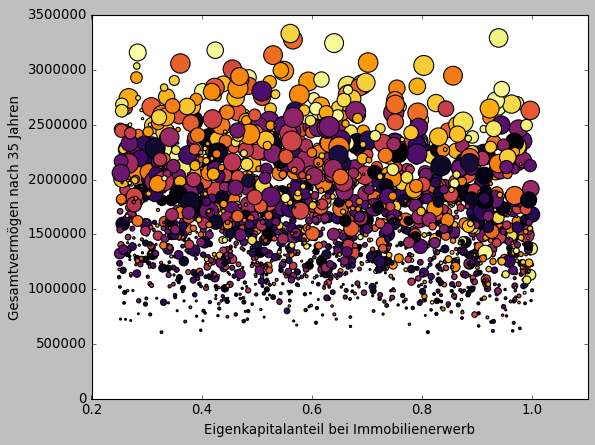

In [15]:
a = np.array(wertst)**100
plt.scatter(x = eigenkap, y =Ergebnisse_Kaufen,s=a,  c=rend, cmap= "inferno")
plt.ylabel("Gesamtvermögen nach 35 Jahren")
plt.xlabel("Eigenkapitalanteil bei Immobilienerwerb")
plt.show()